In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
print(os.listdir('../../Data'))

['RawData.csv', 'sorted20File.txt', 'labelledData', 'splittedDataWithLabels', 'analyze.csv']


In [4]:
# Histogram of column data
def plotHistogram(df, nHistogramShown, nHistogramPerRow):
    
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nHistRow = (nCol + nHistogramPerRow - 1) / nHistogramPerRow
    plt.figure(num=None, figsize=(6*nHistogramPerRow, 8*nHistRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nHistogramShown)):
        plt.subplot(nHistRow, nHistogramPerRow, i+1)
        df.iloc[:,i].hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.savefig("Histogram.jpg")
    plt.show()

In [9]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.savefig("CorrelationPlot.jpg")
    plt.show()
    

In [11]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.savefig("ScatterPlot.jpg")
    plt.show()
    


In [7]:
nRowsRead = 10000 # specify 'None' if want to read whole file
#read10000 rows
df1 = pd.read_csv('/home/manhturong/Documents/Mitech/IP-Network-Traffic/Codes/Data/RawData.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Data'
nRow, nCol = df1.shape
print(df1)

print(f'There are {nRow} rows and {nCol} columns')

Flow.ID        Source.IP  Source.Port  \
0         172.19.1.46-10.200.7.7-52422-3128-6      172.19.1.46        52422   
1         172.19.1.46-10.200.7.7-52422-3128-6       10.200.7.7         3128   
2        10.200.7.217-50.31.185.39-38848-80-6     50.31.185.39           80   
3        10.200.7.217-50.31.185.39-38848-80-6     50.31.185.39           80   
4       192.168.72.43-10.200.7.7-55961-3128-6    192.168.72.43        55961   
...                                       ...              ...          ...   
9995  192.168.180.117-10.200.7.7-59785-3128-6  192.168.180.117        59785   
9996  192.168.180.117-10.200.7.7-59785-3128-6       10.200.7.7         3128   
9997   192.168.10.133-10.200.7.4-50925-3128-6   192.168.10.133        50925   
9998    10.200.7.194-77.234.41.41-49430-443-6     10.200.7.194        49430   
9999   192.168.10.133-10.200.7.4-50925-3128-6       10.200.7.4         3128   

       Destination.IP  Destination.Port  Protocol           Timestamp  \
0          10.20

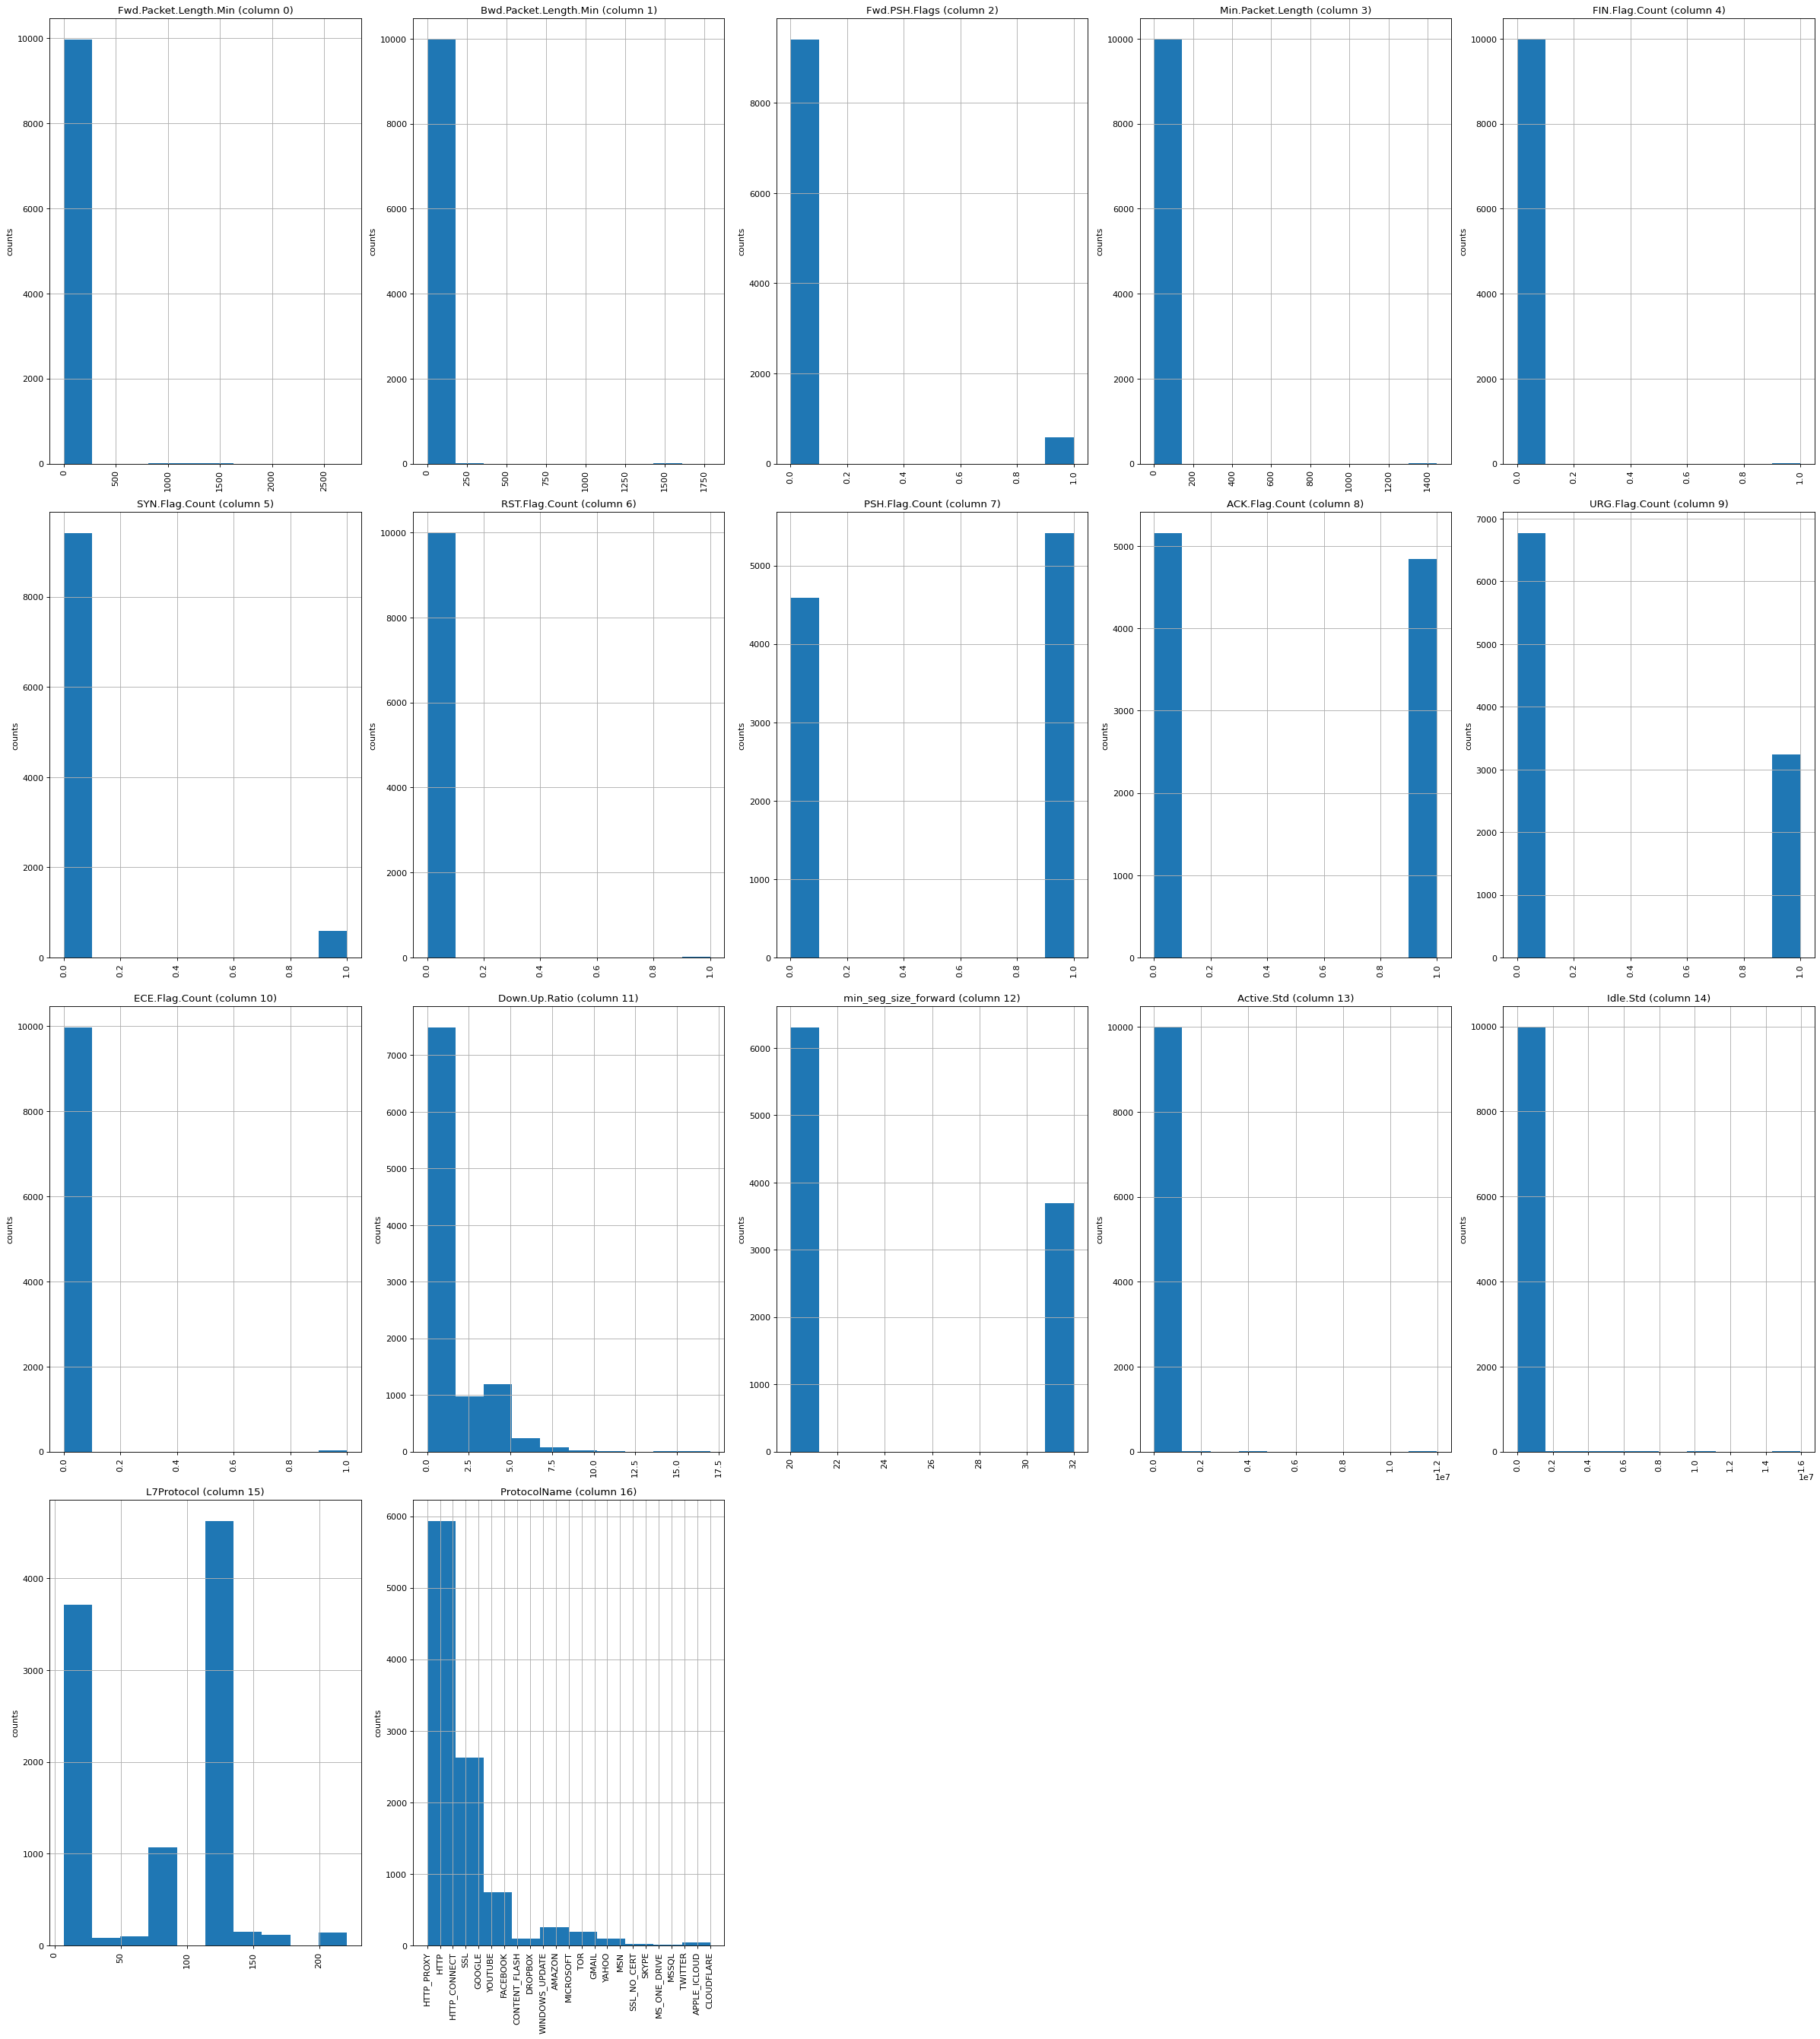

In [44]:
plotHistogram(df1, 20, 5)

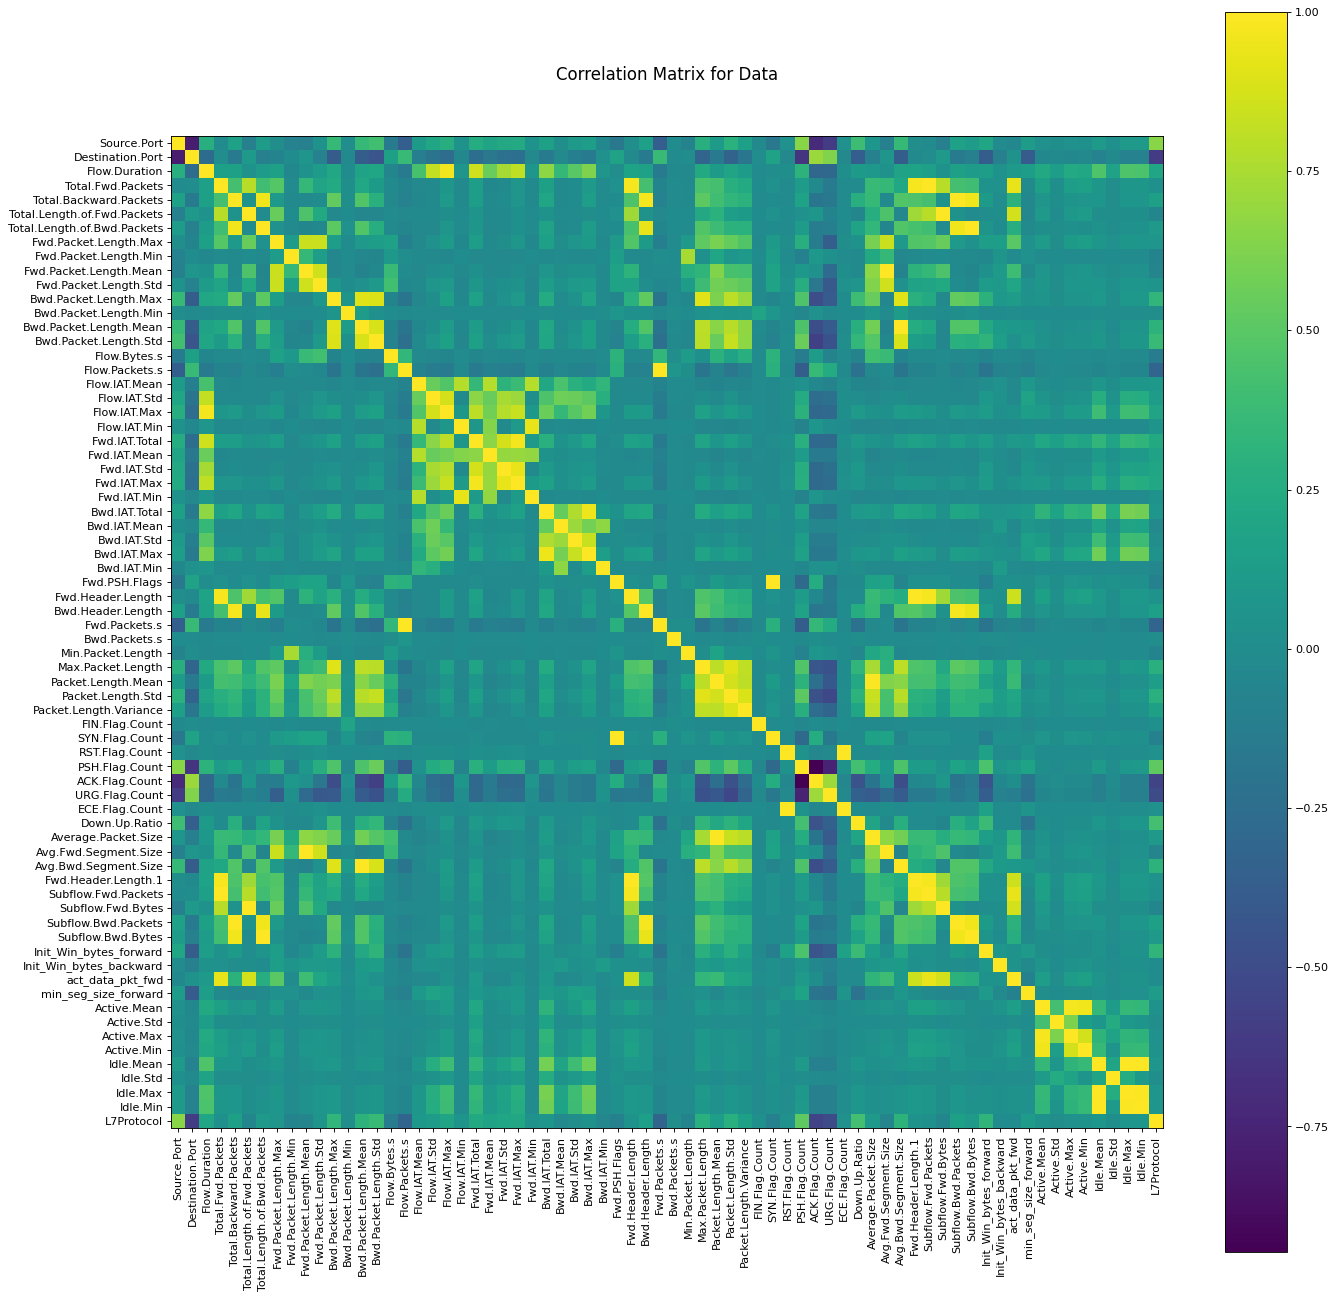

In [10]:
plotCorrelationMatrix(df1, 20)

In [ ]:
plotScatterMatrix(df1, 20, 10)

In [48]:
def boxPlot(df):
    for col in df.columns:
        try:
            temp = df[col]
            plt.boxplot(temp)
            plt.savefig("./BoxPlot/"+col +".jpg")
            plt.show()
            print(col)
            print("================================")  
        except:
            continue

In [ ]:
boxPlot(df1)